## The University of Melbourne, School of Computing and Information Systems
# COMP90086 Computer Vision, 2022 Semester 2

## Assignment 2

**Student Name:**    Xing Yang Goh

**Student ID:**     1001969

## This iPython notebook is a template which you should use for your Assignment 2 submission. This file should be submitted at the **Assignment 2: Code** link on the LMS.

In addition to this file, you should submit a written report explaining your results at the **Assignment 2: Report** link on the LMS. Please see the assignment specification for details on what must be included in the report for each question.

*Adding proper comments to your code is MANDATORY.*

### 1. CNN implementation

In this problem, you will implement a CNN to classify the yoga32 dataset. The following code section will load the dataset from a folder that you specify. You may change the batch sizes and validation percentage if you wish, but otherwise it is recommended that you do not modify this section.

In [131]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math
import secrets

data_dir = "./yoga32"
train_batch_size = 32
rand_seed = 92328734 # random seed for train/val split
# note that same seed must be used for both to ensure no overlap in train/val data

# Get training images from 'train' directory
train_data = tf.keras.utils.image_dataset_from_directory(
    data_dir+'/train',
    validation_split=0.2,
    subset="training",
    seed=rand_seed,
    image_size=(32, 32),
    batch_size=train_batch_size)

# Get validation images from 'train' directory
val_data = tf.keras.utils.image_dataset_from_directory(
    data_dir+'/train',
    validation_split=0.2,
    subset="validation",
    seed=rand_seed,
    image_size=(32, 32),
    batch_size=train_batch_size)



# Output list of class names
class_names = train_data.class_names
num_classes = len(class_names)
print(class_names)

# Normalise the testing and training data 
def normalise_image(image, label):
    return tf.cast(image, tf.float32) / 255.0, label 

train_data = train_data.map(normalise_image)
val_data = val_data.map(normalise_image)

# Note: To train a model with the dataset loaded above, pass the train and val
# datasets to the fit() function, like so:
# myCNNmodel.fit(train_data, validation_data=val_data, epochs=number_of_epochs)

Found 520 files belonging to 10 classes.
Using 416 files for training.
Found 520 files belonging to 10 classes.
Using 104 files for validation.
['bridge', 'childs', 'downwarddog', 'mountain', 'plank', 'seatedforwardbend', 'tree', 'trianglepose', 'warrior1', 'warrior2']
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


1.1. Implement the CNN shown in the assignment specification and train it on the provided dataset. Plot the training accuracy and validation accuracy over epochs.

Epoch 1/20
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
13/13 [==============================] - ETA: 0s - loss: 2.3099 - accuracy: 0.0721WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7fd35959ef80> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and 

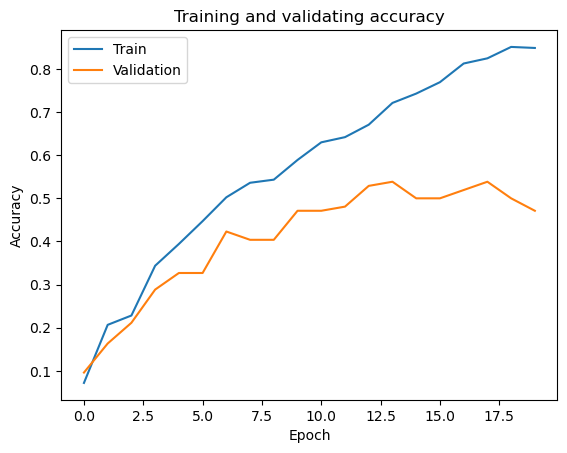

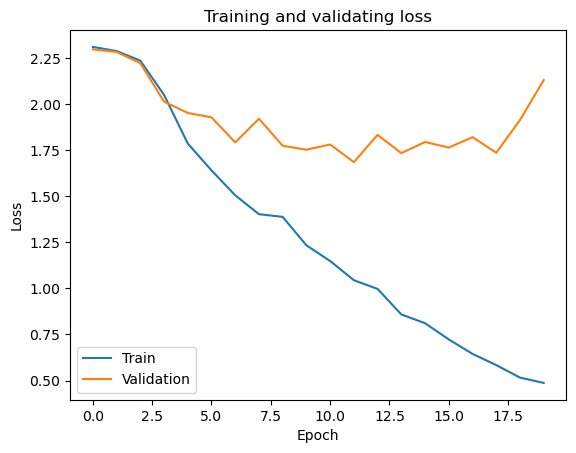

In [132]:
cnn = keras.Sequential(
    [
        layers.InputLayer((32, 32, 3)),
        
        layers.Conv2D(16, (3, 3), strides=(1, 1), activation='relu', padding='valid'), # fill in
        layers.Conv2D(16, (3, 3), strides=(1, 1), activation='relu', padding='valid'), # fill in
        layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'), # fill in
        layers.Conv2D(24, (3, 3), strides=(1, 1), activation='relu', padding='valid'), # fill in
        layers.Conv2D(24, (3, 3), strides=(1, 1), activation='relu', padding='valid'), # fill in
        layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'), # fill in
        layers.Flatten(),
        layers.Dense(10, activation='softmax')
    ], 
)

cnn.compile(optimizer='adam',
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
            metrics=['accuracy'])

history_cnn = cnn.fit(train_data, validation_data=val_data, epochs=20);

plt.plot(history_cnn.history['accuracy'], label='Train')
plt.plot(history_cnn.history['val_accuracy'], label='Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Training and validating accuracy')
plt.legend()
plt.show()

plt.plot(history_cnn.history['loss'], label='Train')
plt.plot(history_cnn.history['val_loss'], label='Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Training and validating loss')
plt.legend()
plt.show()

In [133]:
cnn.summary()

Model: "sequential_68"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_156 (Conv2D)         (None, 30, 30, 16)        448       
                                                                 
 conv2d_157 (Conv2D)         (None, 28, 28, 16)        2320      
                                                                 
 max_pooling2d_78 (MaxPoolin  (None, 14, 14, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_158 (Conv2D)         (None, 12, 12, 24)        3480      
                                                                 
 conv2d_159 (Conv2D)         (None, 10, 10, 24)        5208      
                                                                 
 max_pooling2d_79 (MaxPoolin  (None, 5, 5, 24)         0         
 g2D)                                                

1.2. Modify the CNN (see assignment spec for details) and train it on the provided dataset.  Plot the training accuracy and validation accuracy over epochs.

Epoch 1/30
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
 9/13 [===================>..........] - ETA: 0s - loss: 2.4900 - accuracy: 0.0451WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7fd38e179b00> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and 

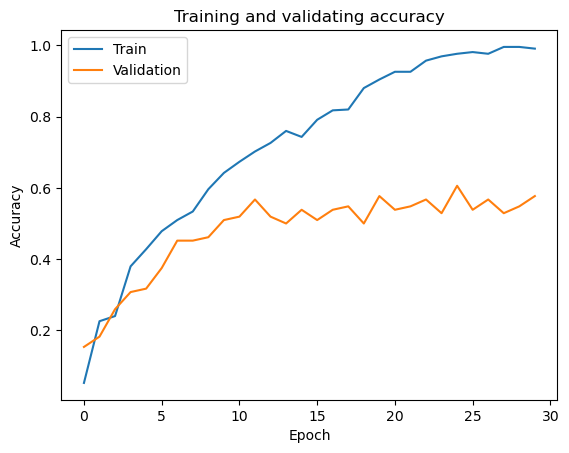

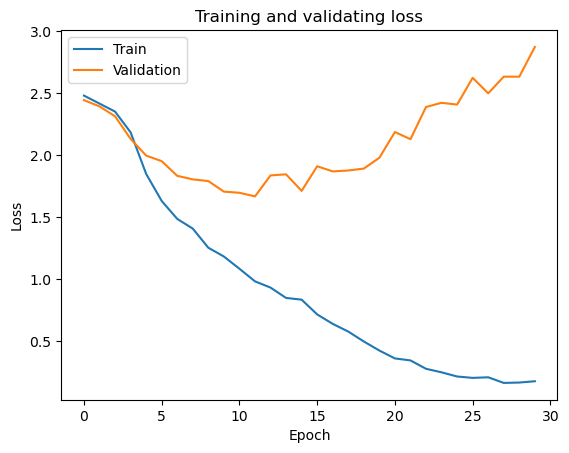

In [134]:

cnn = keras.Sequential(
    [
        layers.InputLayer((32, 32, 3)),
        
        layers.Conv2D(16, (3, 3), strides=(1, 1), activation='relu', padding='valid'), # fill in
        
        layers.Conv2D(16, (3, 3), strides=(1, 1), activation='relu', padding='valid'), # fill in
        
        layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'), # fill in
        
        layers.Conv2D(24, (3, 3), strides=(1, 1), activation='relu', 
                      padding='valid'), # fill in
        
        layers.Conv2D(24, (3, 3), strides=(1, 1), activation='relu', 
                      padding='valid'), # fill in
        
        layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'), # fill in
        
        layers.Flatten(),
        
        layers.Dense(10, activation='softmax', kernel_regularizer=regularizers.l2(0.01))
    ], 
)

cnn.compile(optimizer='adam',
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
            metrics=['accuracy'])

history_cnn = cnn.fit(train_data, validation_data=val_data, epochs=30)

plt.plot(history_cnn.history['accuracy'], label='Train')
plt.plot(history_cnn.history['val_accuracy'], label='Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Training and validating accuracy')
plt.legend()
plt.show()

plt.plot(history_cnn.history['loss'], label='Train')
plt.plot(history_cnn.history['val_loss'], label='Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Training and validating loss')
plt.legend()
plt.show()

Epoch 1/28
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
13/13 [==============================] - ETA: 0s - loss: 2.7141 - accuracy: 0.0697WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7fd35a6bb200> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and 

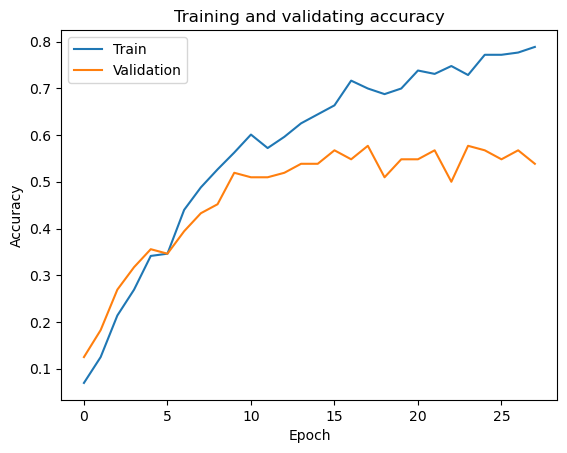

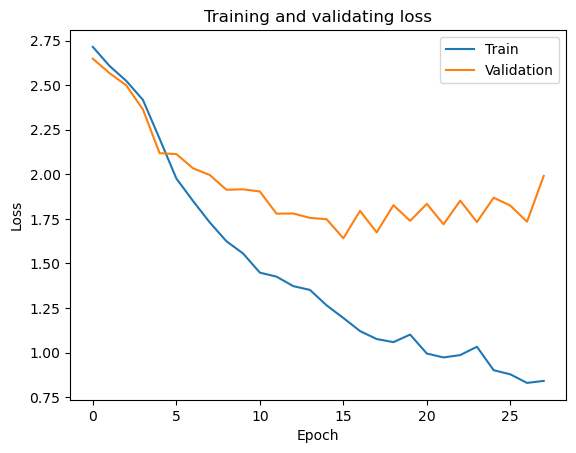

In [158]:
data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.Resizing(height=32, width=32),
        layers.experimental.preprocessing.RandomFlip(mode="horizontal"),
        layers.experimental.preprocessing.RandomZoom(0.1),
        layers.experimental.preprocessing.RandomContrast(factor=0.25),

    ]
)

cnn = keras.Sequential(
    [
        layers.InputLayer((32, 32, 3)),
        
        data_augmentation,

        layers.Conv2D(16, (3, 3), strides=(1, 1), activation='relu', padding='valid'), # fill in
        
        layers.Conv2D(16, (3, 3), strides=(1, 1), activation='relu', padding='valid'), # fill in
        
        layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'), # fill in
        
        layers.Conv2D(24, (3, 3), strides=(1, 1), activation='relu', 
                      padding='valid'), # fill in
        
        layers.Conv2D(24, (3, 3), strides=(1, 1), activation='relu', 
                      padding='valid', kernel_regularizer=regularizers.l2(0.01)), # fill in
        
        layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'), # fill in
        
        layers.Flatten(),
        
        layers.Dense(10, activation='softmax', kernel_regularizer=regularizers.l2(0.01))
    ], 
)

cnn.compile(optimizer='adam',
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
            metrics=['accuracy'])

history_cnn = cnn.fit(train_data, validation_data=val_data, epochs=28)

plt.plot(history_cnn.history['accuracy'], label='Train')
plt.plot(history_cnn.history['val_accuracy'], label='Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Training and validating accuracy')
plt.legend()
plt.show()

plt.plot(history_cnn.history['loss'], label='Train')
plt.plot(history_cnn.history['val_loss'], label='Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Training and validating loss')
plt.legend()
plt.show()

### 2. Error anaylsis
Evaluate your CNN model from question 1.2 on the test dataset. See assignment spec for details.

In [159]:
results = cnn.evaluate(test_data)
#tf.compat.v1.metrics.mean_per_class_accuracy()

3/3 [==============================] - 0s 6ms/step - loss: 2.2617 - accuracy: 0.4828


In [214]:
from sklearn.metrics import confusion_matrix

test_data = tf.keras.utils.image_dataset_from_directory(
    data_dir+'/test',
    seed=rand_seed,
    image_size=(32, 32),
    batch_size=32)
test_data = test_data.map(normalise_image)

y_true = []
y_pred = []
for element in test_data.as_numpy_iterator():
    predictions = cnn.predict(element[0])
    predicted_label = predictions.argmax(axis=-1)
    
    y_pred = np.concatenate((y_pred, predicted_label))
    y_true= np.concatenate((y_true, element[1]))

#y_true = [item for sublist in y_true for item in sublist]
#y_pred = [item for sublist in y_pred for item in sublist]

matrix = confusion_matrix(y_true, y_pred)
matrix.diagonal()/matrix.sum(axis=1)

Found 87 files belonging to 10 classes.


array([0.3       , 0.18181818, 0.42857143, 1.        , 0.38461538,
       0.27272727, 0.42857143, 0.85714286, 0.85714286, 0.57142857])

In [411]:
from sklearn.metrics import accuracy_score
print(class_names)
accuracy_score(y_true,y_pred)

['bridge', 'childs', 'downwarddog', 'mountain', 'plank', 'seatedforwardbend', 'tree', 'trianglepose', 'warrior1', 'warrior2']


/Users/yang/opt/anaconda3/envs/tf/lib/python3.7/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/yang/opt/anaconda3/envs/tf/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


nan

### 3. Visualisation
Visualise the feature space that your model uses to classify images. See assignment spec for details.

In [216]:
cnn.summary()

Model: "sequential_73"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_72 (Sequential)  (None, 32, 32, 3)         0         
                                                                 
 conv2d_168 (Conv2D)         (None, 30, 30, 16)        448       
                                                                 
 conv2d_169 (Conv2D)         (None, 28, 28, 16)        2320      
                                                                 
 max_pooling2d_84 (MaxPoolin  (None, 14, 14, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_170 (Conv2D)         (None, 12, 12, 24)        3480      
                                                                 
 conv2d_171 (Conv2D)         (None, 10, 10, 24)        5208      
                                                     

In [325]:
# Make images into a single array

all_test_images = []
all_train_images = []
for test_batch in test_data.as_numpy_iterator():
    test_images = test_batch[0]
    for i in range(0, len(test_images)):
        all_test_images.append(test_images[i])
        
for train_batch in train_data.as_numpy_iterator():
    train_images = train_batch[0]
    for i in range(0, len(train_images)):
        all_train_images.append(train_images[i])
        
len(all_train_images)

416

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


/Users/yang/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


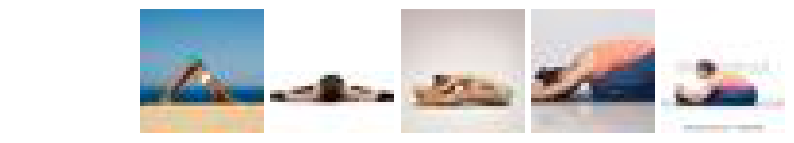

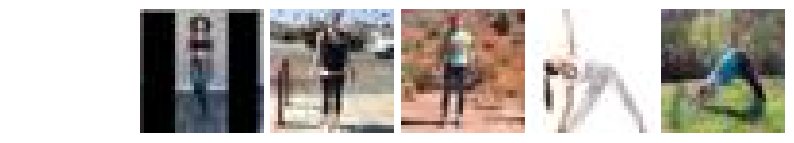

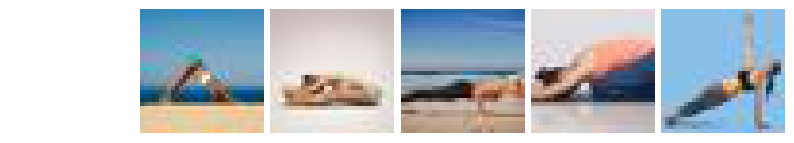

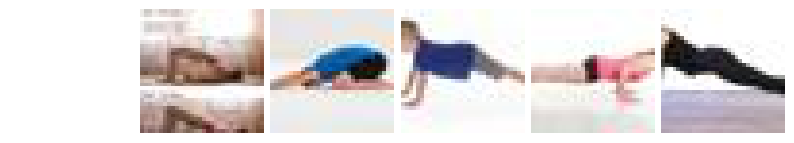

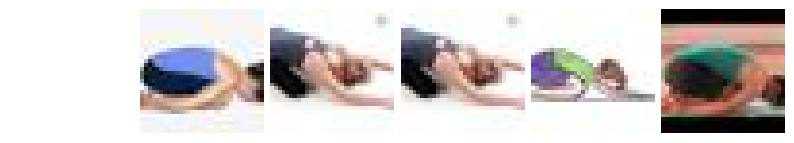

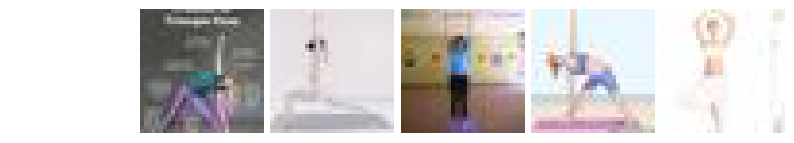

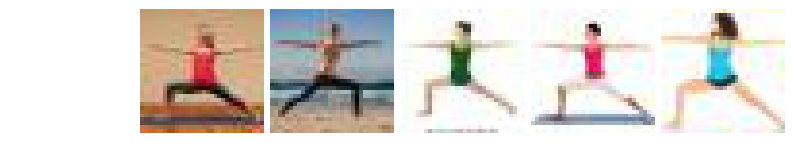

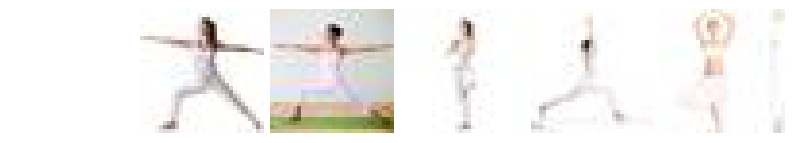

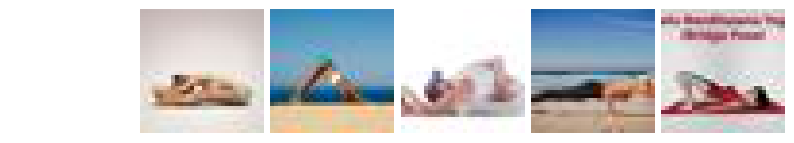

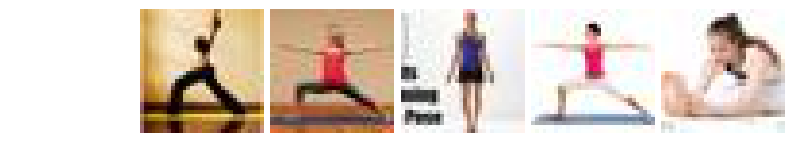

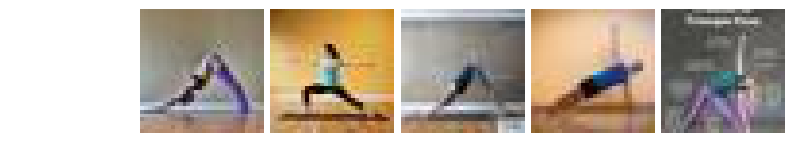

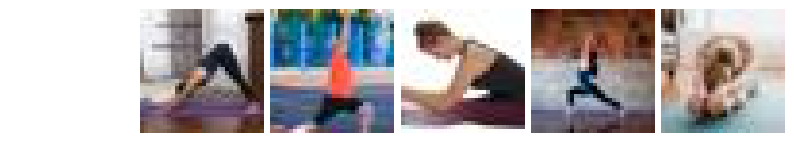

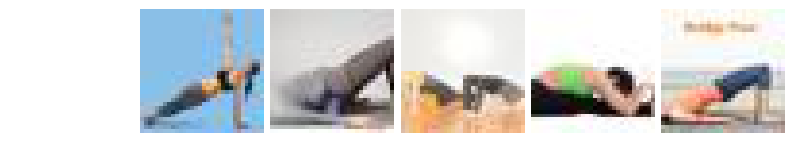

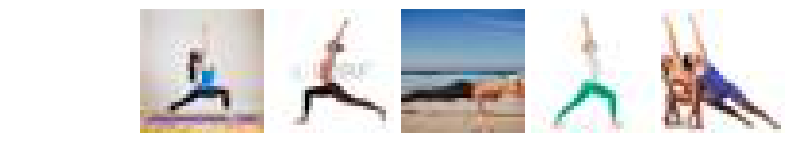

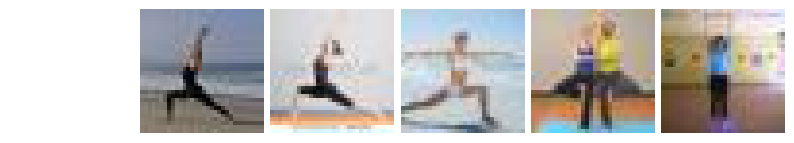

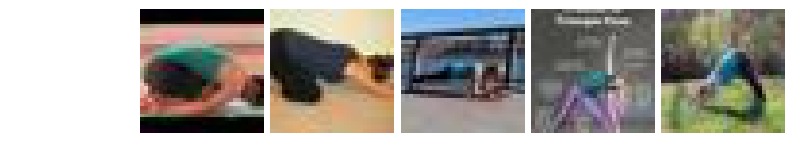

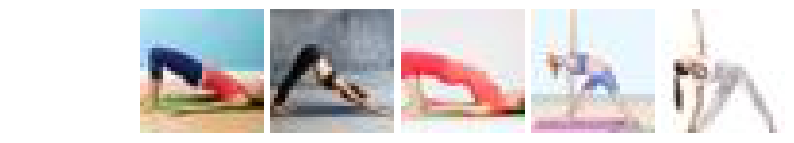

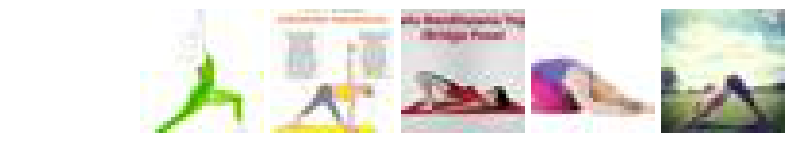

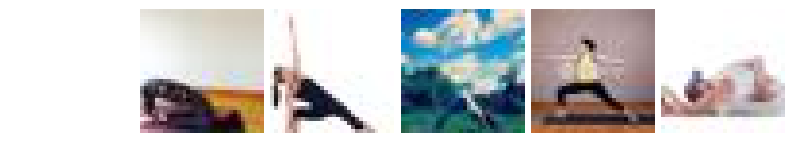

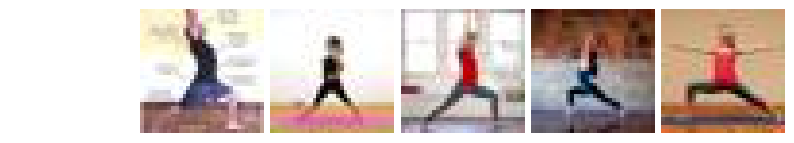

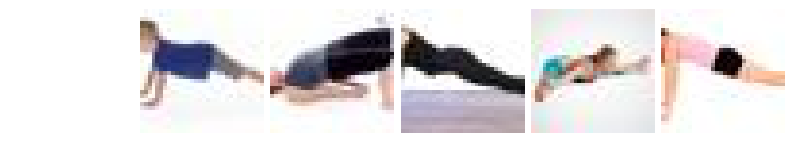

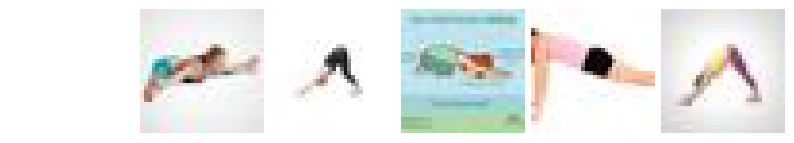

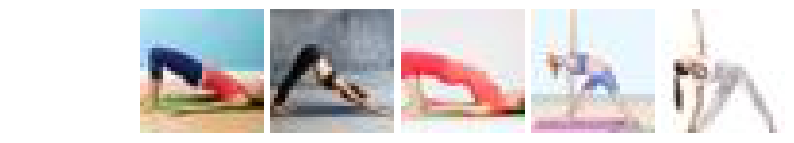

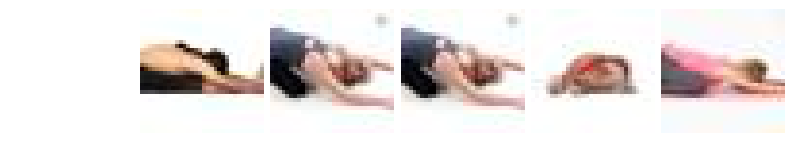

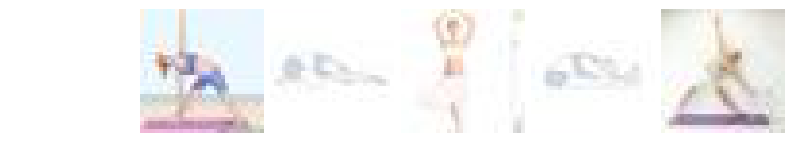

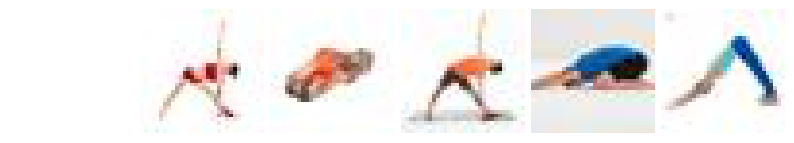

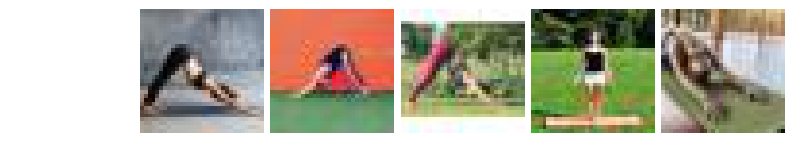

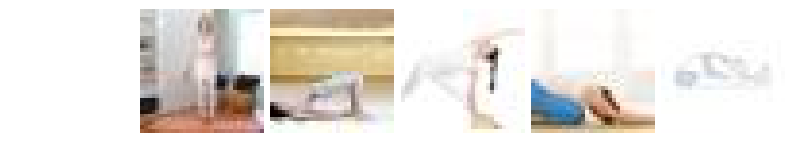

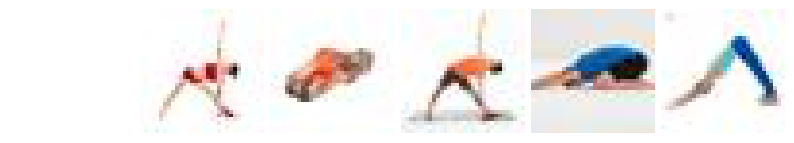

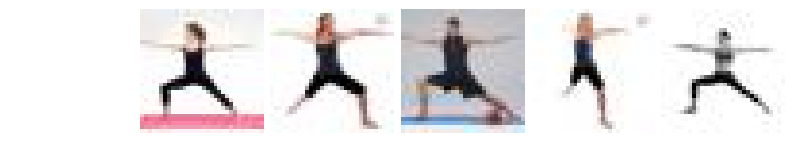

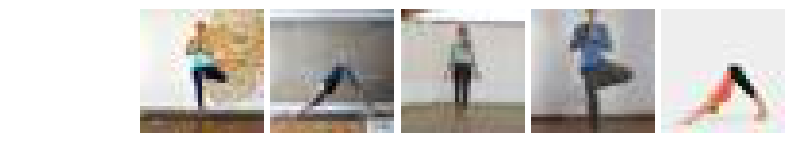

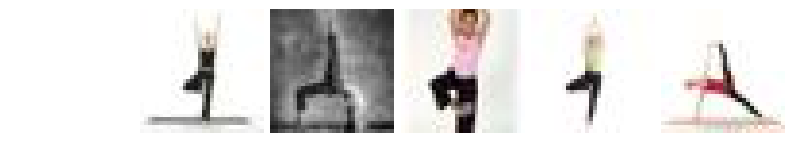

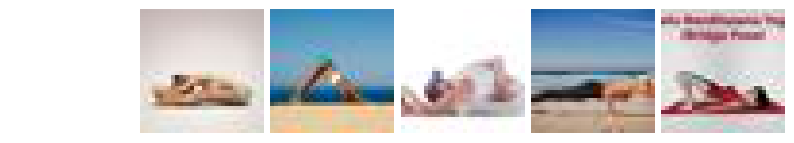

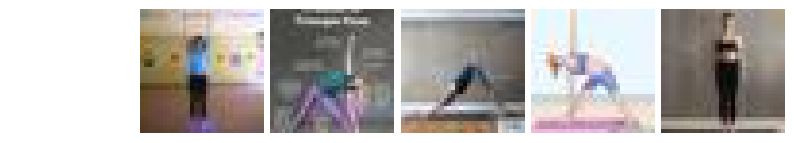

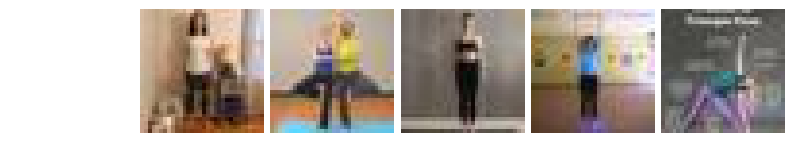

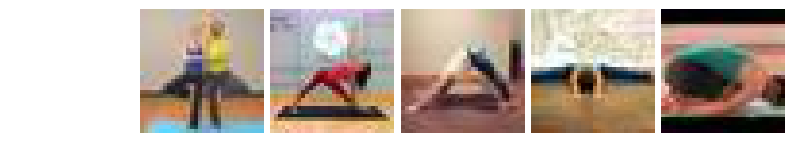

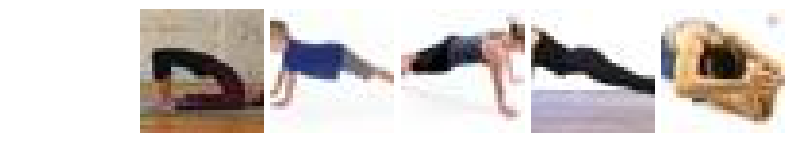

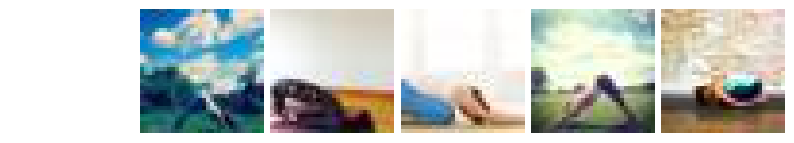

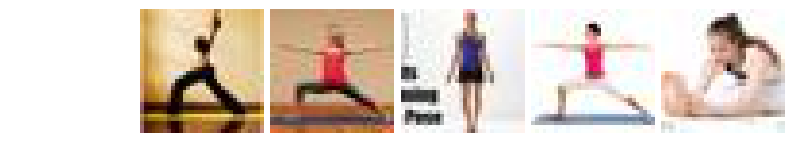

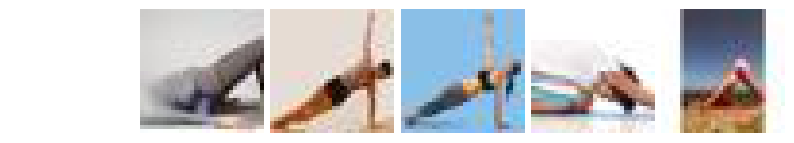

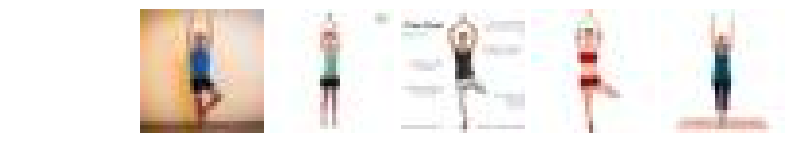

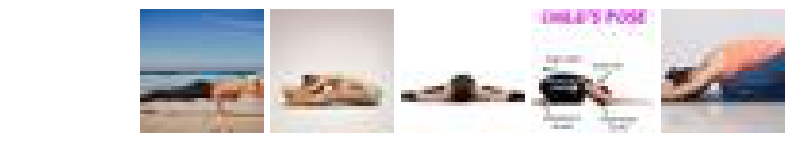

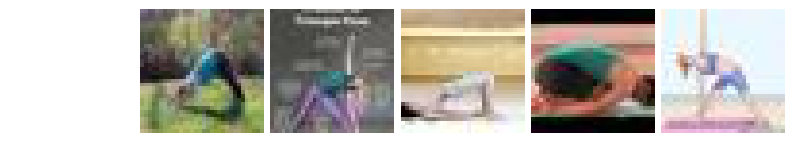

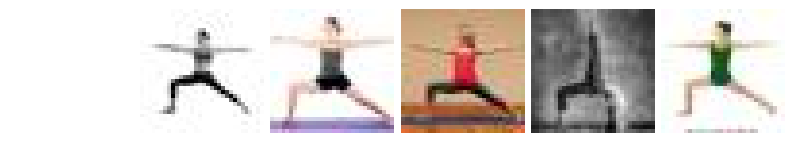

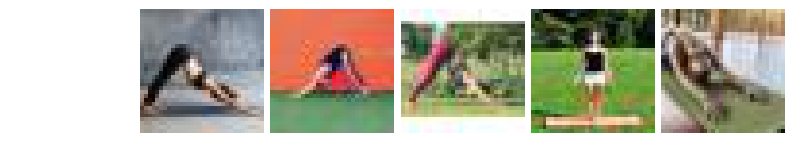

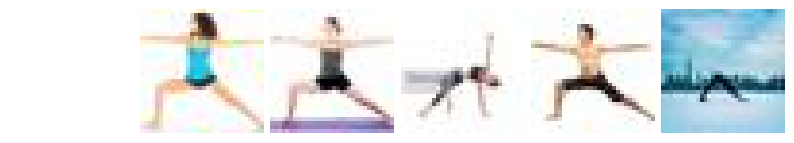

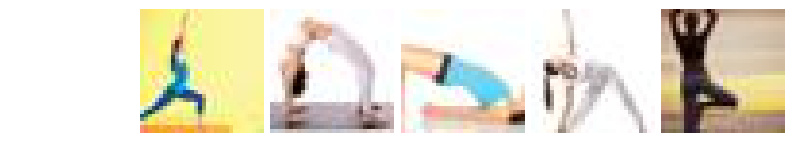

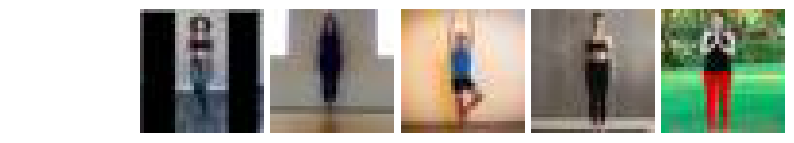

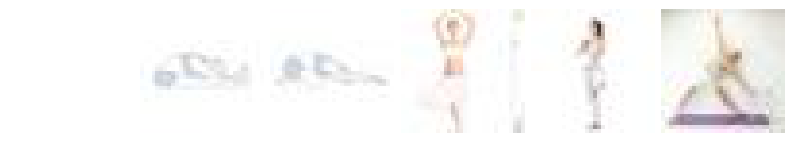

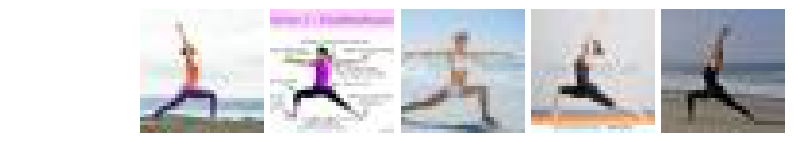

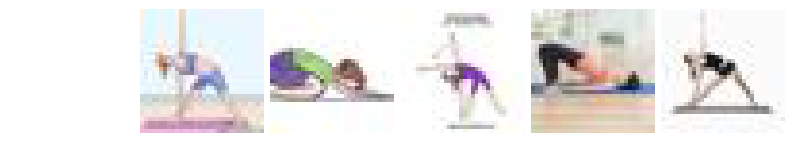

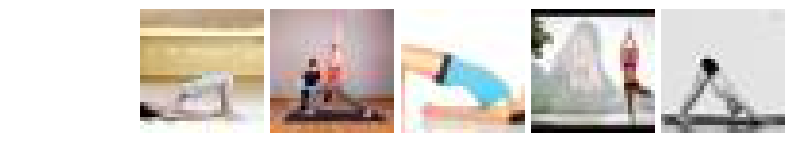

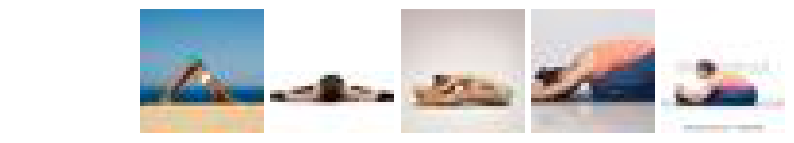

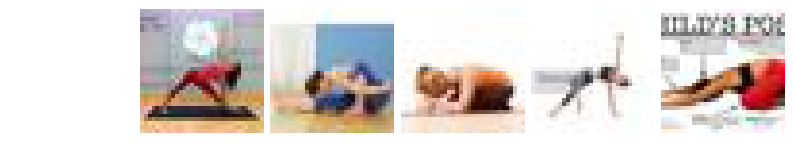

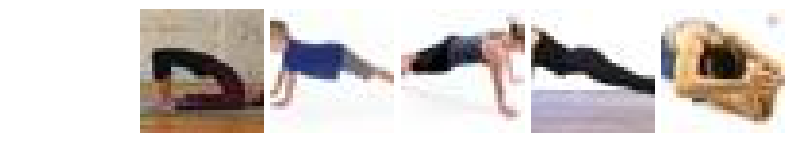

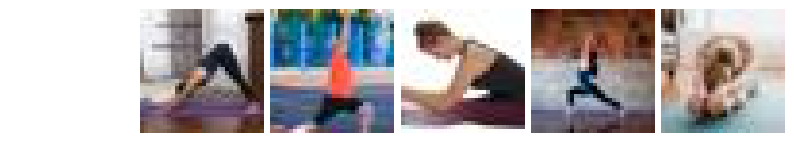

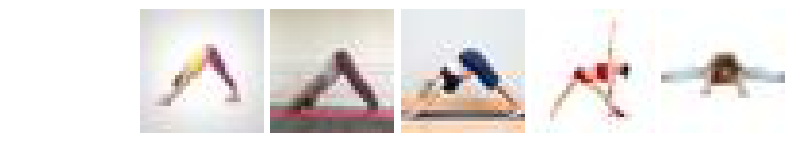

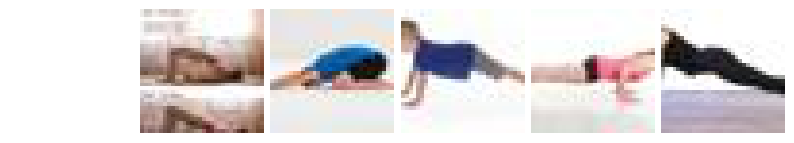

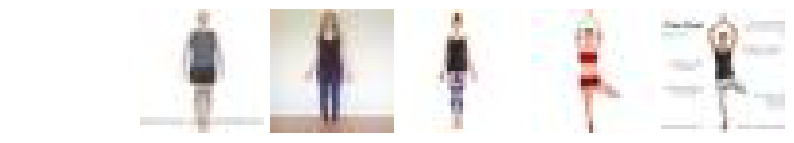

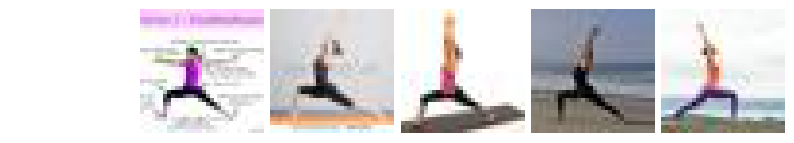

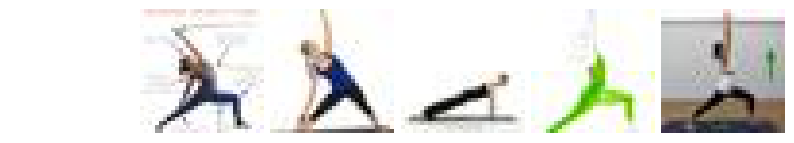

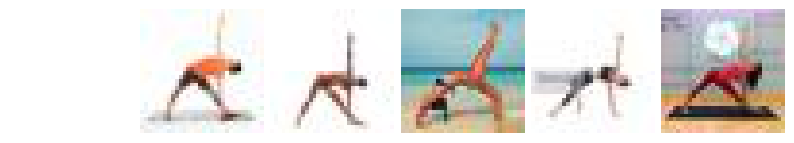

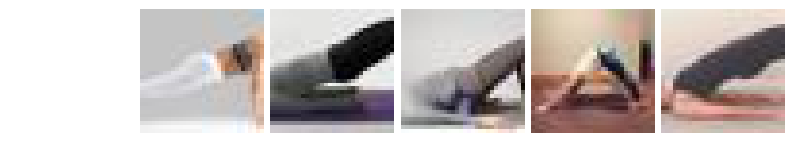

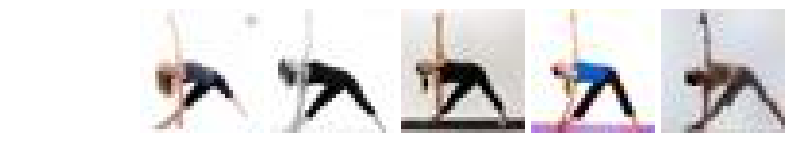

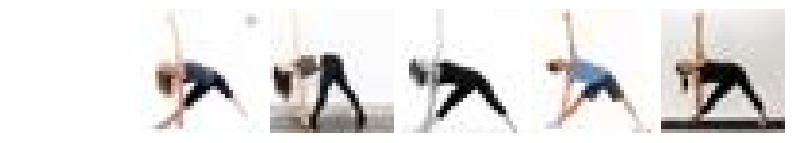

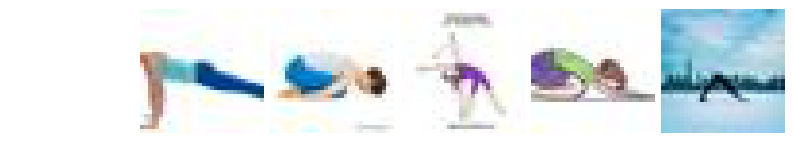

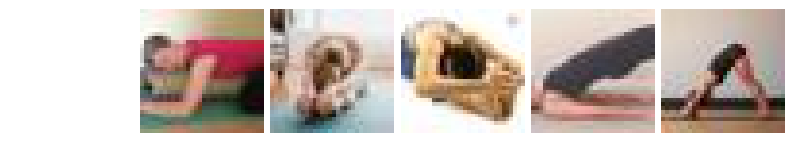

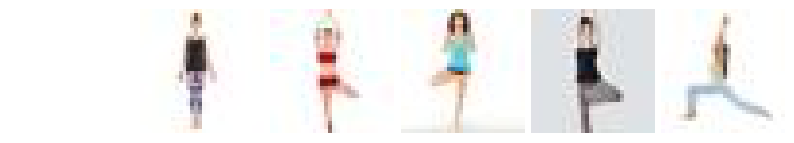

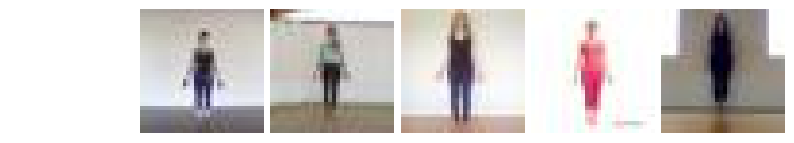

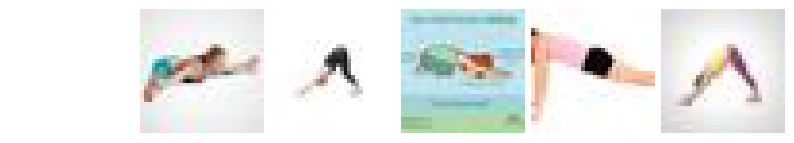

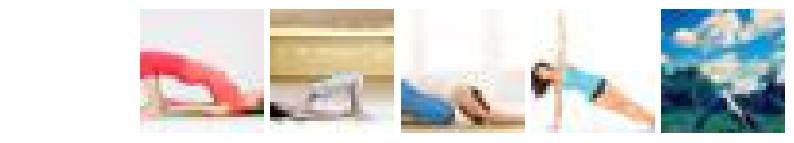

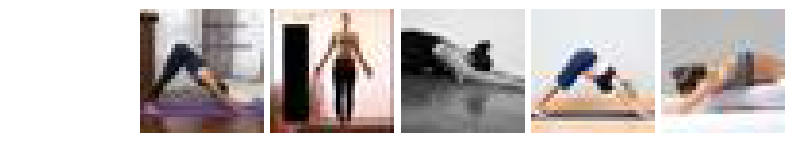

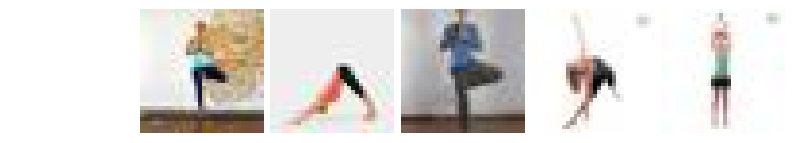

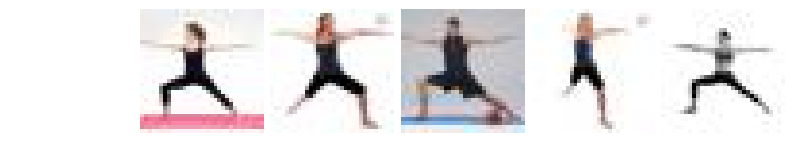

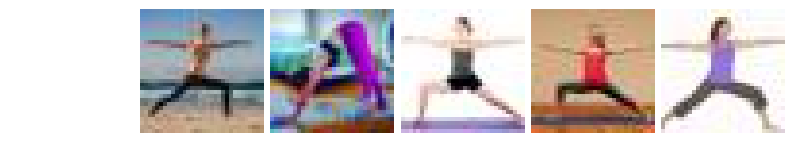

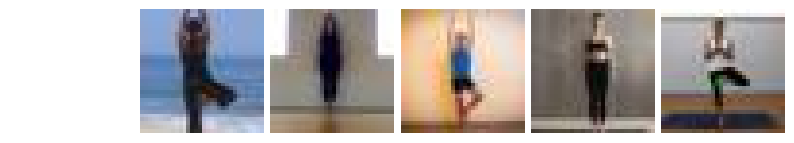

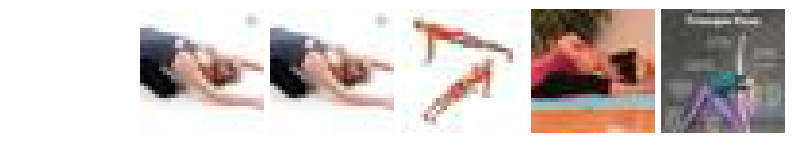

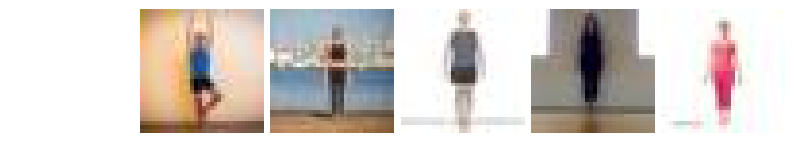

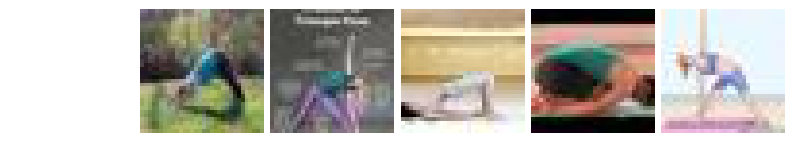

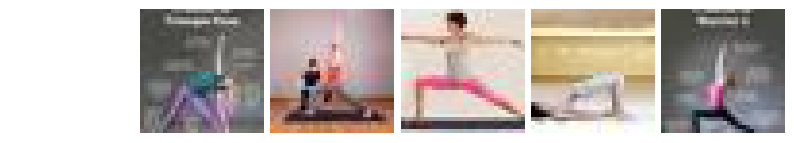

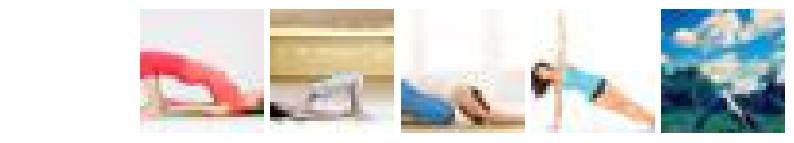

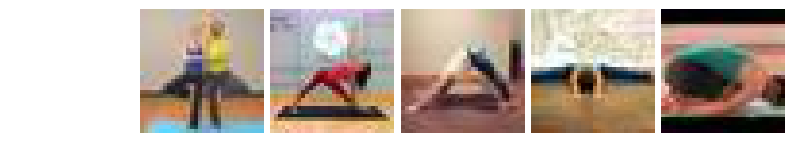

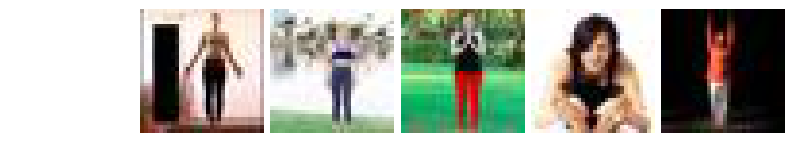

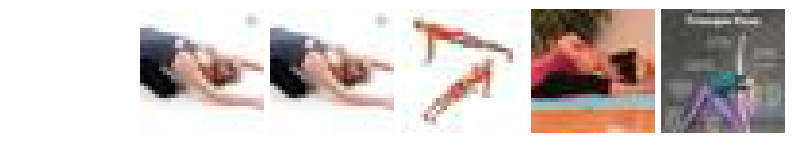

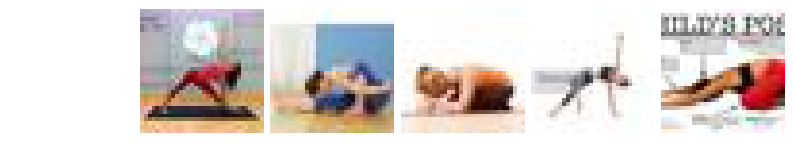

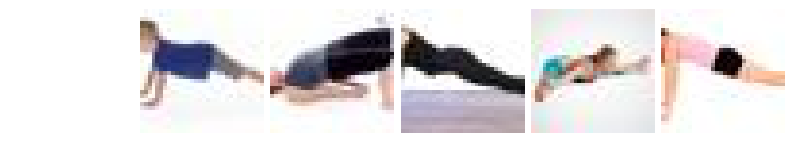

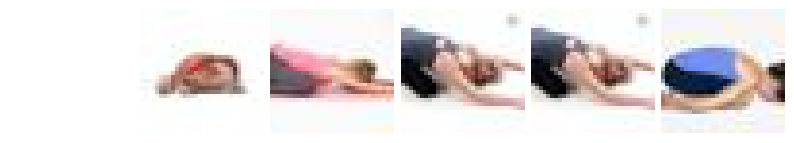

In [410]:
from scipy.spatial import distance

# Extracts the ouput of the top 12 layers (excluding the input layer)
layer_outputs = [layer.output for layer in cnn.layers[1:8]]  
# Creates a model that will return these outputs, given the model input
activation_model = Model(inputs=cnn.input, outputs=layer_outputs)
# Returns a list of five Numpy arrays: one array per layer activation
activations = activation_model.predict(test_data)
# Store the name of the layers
layer_names = []
for layer in cnn.layers[1:8]:
    layer_names.append(layer.name)
    # Getting Activations of the flatten layer
    flat_layer_activation = activations[6]
    
flat_layer_num = 32 
test_activations = []
train_activations = []
NN = np.ones(5) * np.inf
NN_index = np.ones(5) * np.inf

for image in all_test_images:
    image = tf.expand_dims(image, axis=0)
    all_activations = activation_model.predict(image)
    test_activations.append(all_activations[6][:][:])

for image in all_train_images:
    image = tf.expand_dims(image, axis=0)
    all_activations = activation_model.predict(image)
    train_activations.append(all_activations[6][:][:])

for test in test_activations:
    for i in range(0, len(train_activations)):
        euclidean_distance = distance.euclidean(test, train_activations[i])
        for j in range(0, len(NN)):
            if euclidean_distance < NN[j]:
                NN[j] = euclidean_distance
                NN_index[j] = i
                NN, NN_index = (list(t) for t in zip(*sorted(zip(NN, NN_index), reverse=True)))
                break
                
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(1, 6, 1)
    ax = plt.imshow(test)
    plt.axis('off')
    fig.subplots_adjust(wspace=3, hspace=0.05)
    NN, NN_index = (list(t) for t in zip(*sorted(zip(NN, NN_index))))

    for i in range(0,len(NN)):
        ax = fig.add_subplot(1, 6, i+2)
        ax = plt.imshow(all_train_images[NN_index[i]])
        plt.axis('off')
        fig.subplots_adjust(wspace=0.05, hspace=0.05)
    NN = np.ones(5) * np.inf
    NN_index = np.ones(5) * np.inf

